## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>


# Importações

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Importação da base de dados

In [50]:
dados = pd.read_csv('dataset.csv', sep = ";") # leitura de dados

In [51]:
dados.head() # visualização de dados

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [52]:
dados.shape #tamanho dataset.

(5000, 4)

# Analise Preliminares

Analise descritiva


In [53]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [54]:
dados.corr().round(4) #Matriz de correção 

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# Analises Graficas


In [55]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

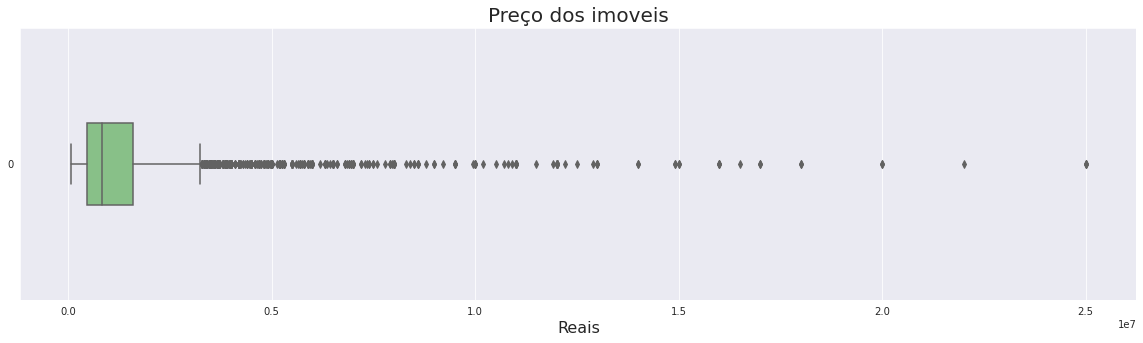

In [56]:
# BOXPLOT

ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos imoveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Visualizando esse boxplot acima parece apresentar uma assimetria a direita. Será feita a distribuição de frequencia para ver se vai se repetir.


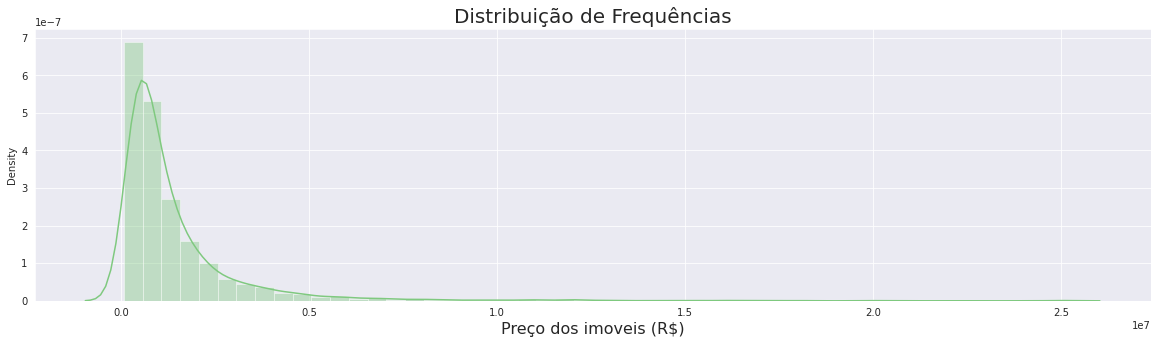

In [57]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 5)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos imoveis (R$)', fontsize=16)
ax

As estatistas são mais confiaveis quando você tem um grafico simetrico, a distribuição plotada acima está com uma assimetria a direita. Deve ser feito transformação nos dados para que ele se aproxime da forma simetrica

# Dispersão entre as Variveis


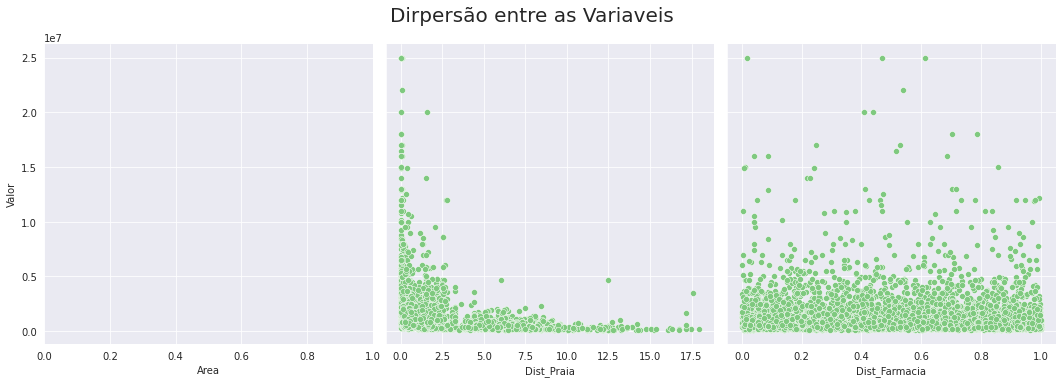

In [58]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dirpersão entre as Variaveis', fontsize=20, y=1.05)
ax

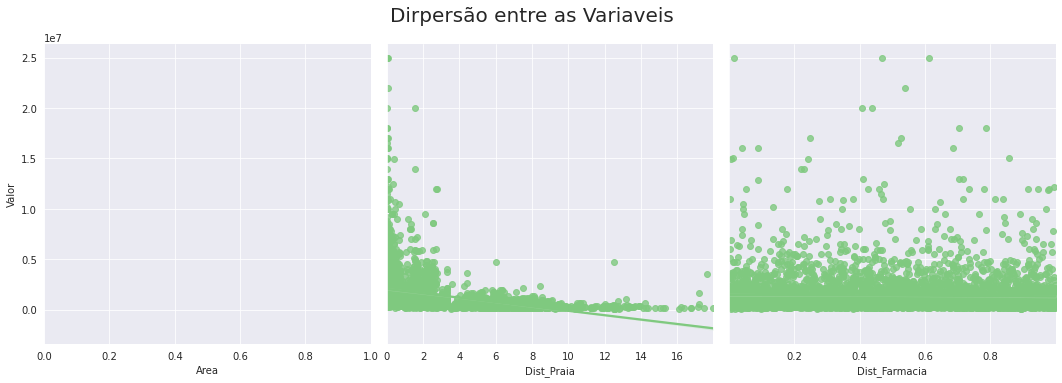

In [59]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dirpersão entre as Variaveis', fontsize=20, y=1.05)
ax

# TRANSFORMAÇÃO DOS DADOS

In [60]:
np.log(0)

-inf

In [61]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1) # pq existem valores 0 no dataset.
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [62]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


Distribuição de frequencia da variavel dependente transformada (Y)

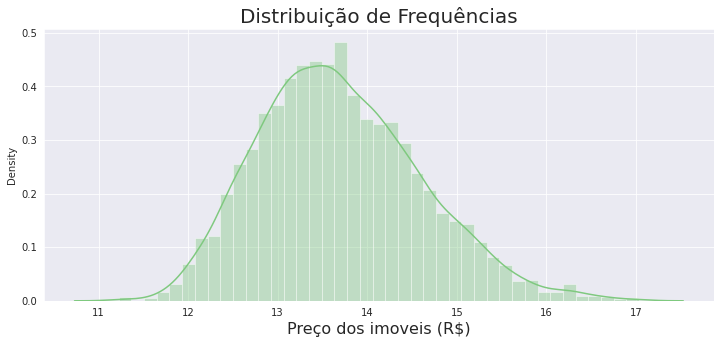

In [63]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12, 5)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos imoveis (R$)', fontsize=16)
ax

Verificação relação **linear**

Graficos de dispersão entre as variaveis transformadas do dataset.

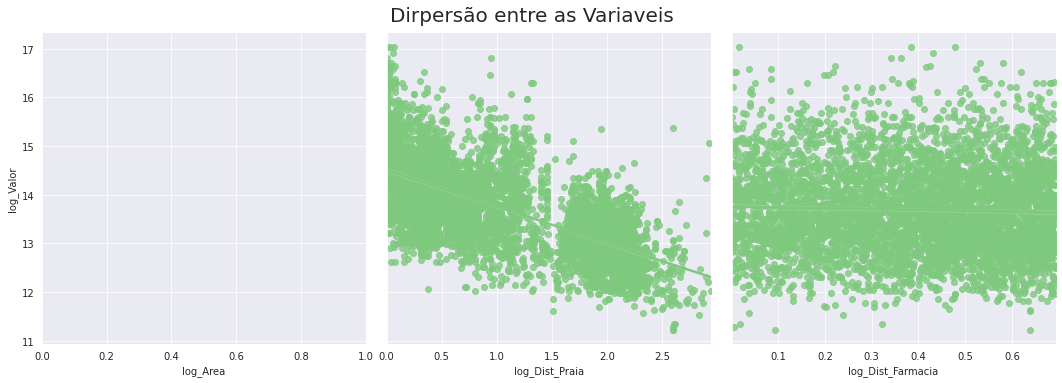

In [64]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dirpersão entre as Variaveis', fontsize=20, y=1.05)
ax

# Criando os dataset de treino e teste


In [65]:
y = dados['log_Valor'] # variavel dependente.

In [66]:
X = dados[['log_Area','log_Dist_Praia', 'log_Dist_Farmacia']] # variaveis explicativas.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

Estimando modelo com statsmodels

In [68]:
X_train_com_constante = sm.add_constant(X_train)

In [69]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

# Avaliando o modelo estimado

    O teste t é utilizado para testar a significância de cada parâmetro individualmente.
    O teste F é utilizado para testar simultaneamente a significância de um conjunto de parâmetros.

    Teste de significância conjunta dos parâmetros
    Prob (F-statistic) <= 0.05 (OK)
    
    Teste de significância individual dos parâmetros
    P>|t| <= 0.05 (OK)

In [70]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:07:29   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

# Modificando o modelo e avaliando novamente o ajuste


In [71]:
X = dados[['log_Area','log_Dist_Praia']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

Adicionando a constante

In [73]:
X_train_com_constante = sm.add_constant(X_train)

In [74]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [75]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:07:29   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# Estimando o modelo


In [76]:
modelo = LinearRegression() #instanciando

In [77]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


Gerando previsões


In [79]:
y_previsto = modelo.predict(X_test)

In [80]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


Gerando dados pontuais

In [81]:
entrada = X_test[0:1]

In [82]:
modelo.predict(entrada)[0]

14.28482006184788

# Invertendo a transformação para obter a estimativa em reais


In [83]:
np.exp(modelo.predict(entrada)[0])

1598889.784779439

# Criando um Simulador simples

In [84]:
Area = 150
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1 )]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 1617664.12


# Interpretação dos Coeficientes Estimados

In [85]:
index = ['Intercepto', ' log Area ', ' log Distancia até a praia ']

In [86]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])

,Parametros
Intercepto,9.334916
log Area,1.058078
log Distancia até a praia,-0.490612


**Interpretação dos Coeficientes Estimados**

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# Analise Grafica dos resultados do modelo

In [87]:
y_previsto_train = modelo.predict(X_train)

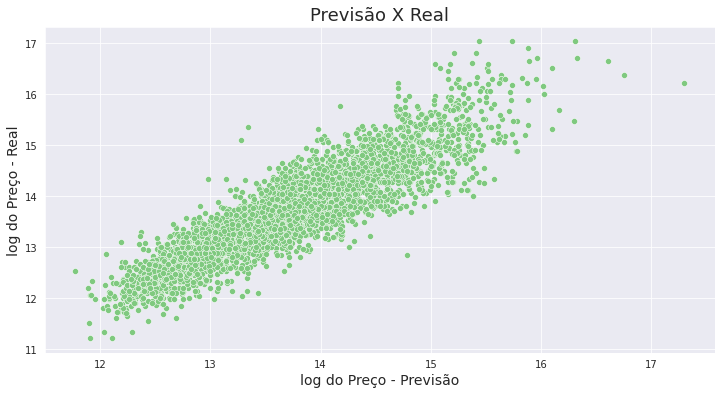

In [88]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

Obtendo residuo

In [89]:
residuo = y_train - y_previsto_train

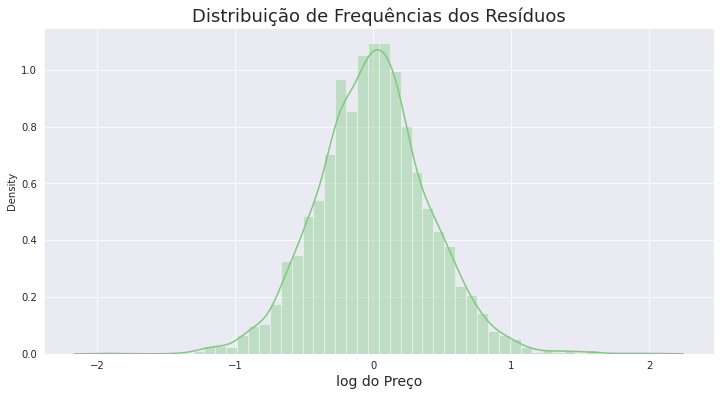

In [90]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax